In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns

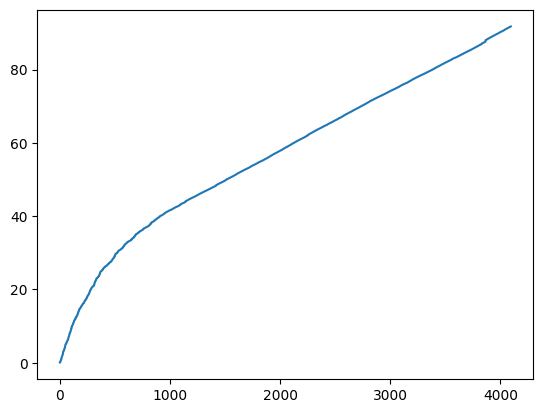

In [5]:
x = np.load('../start_time.npy')
plt.plot(x, label='start_time')

In [12]:
# Load JSON data
file_name = '/mnt/ssd1/alm-os/sglang_multi_model/test_basic_metrics_server_DataParallelRuntimeSelectionPolicy.CUSTOM_200_0.2_4096_50.json'
with open(file_name, 'r') as file:
    data = json.load(file)

# Extract overhead values
overhead_values = [entry['overhead'] for entry in data]
max_index = np.argmax(overhead_values)
max_value = overhead_values[max_index]
print("Index with max overhead:", max_index, data[max_index]['text'])
print("Value with max overhead:", max_value)

Index with max overhead: 45 Workload 104 Solve a question answering task with interleaving Thought, Action, Observation steps. T
Value with max overhead: 0.5558221340179443


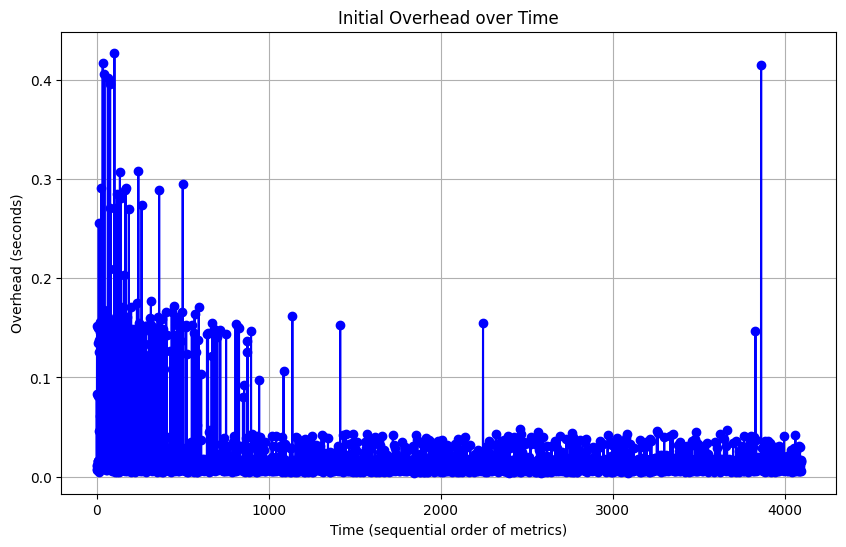

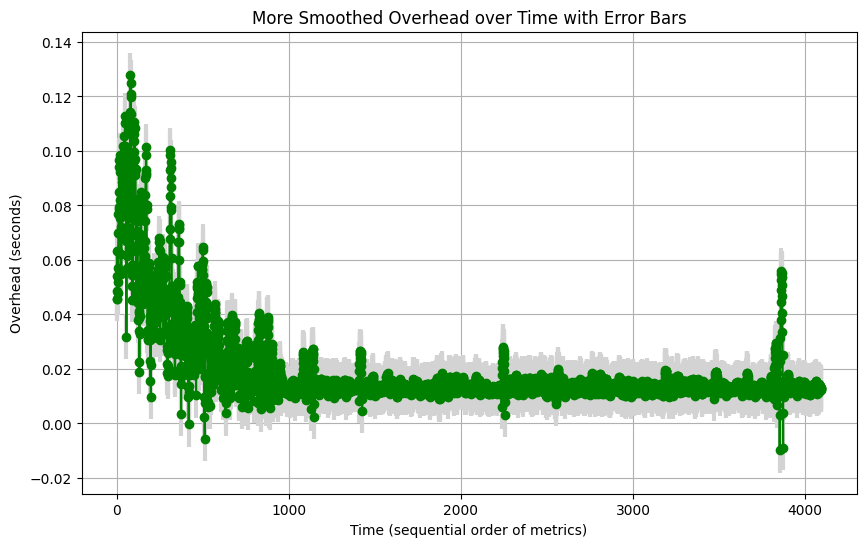

<Axes: ylabel='Density'>

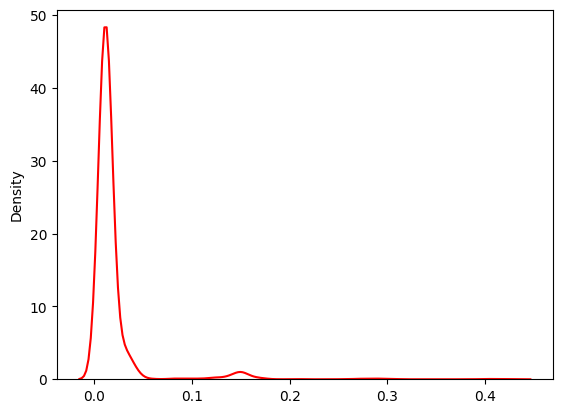

In [8]:
std_dev = np.std(overhead_values) / 4  # Reduced for visualization purposes
error = [std_dev] * len(overhead_values)
# Initial Plot
plt.figure(figsize=(10, 6))
plt.plot(overhead_values, marker='o', linestyle='-', color='b')
plt.title('Initial Overhead over Time')
plt.xlabel('Time (sequential order of metrics)')
plt.ylabel('Overhead (seconds)')
plt.grid(True)
# plt.savefig('initial_overhead_plot.png')
# plt.close()
plt.show()
# More Smoothed Plot
more_smoothed_overhead = savgol_filter(overhead_values, 21, 3)
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(overhead_values)), more_smoothed_overhead, yerr=error, marker='o', linestyle='-', color='g', ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('More Smoothed Overhead over Time with Error Bars')
plt.xlabel('Time (sequential order of metrics)')
plt.ylabel('Overhead (seconds)')
plt.grid(True)
# plt.savefig('more_smoothed_overhead_with_error_bars.png')
# plt.close()
plt.show()
plt.figure()
sns.kdeplot(overhead_values, color='r')

<Axes: ylabel='Density'>

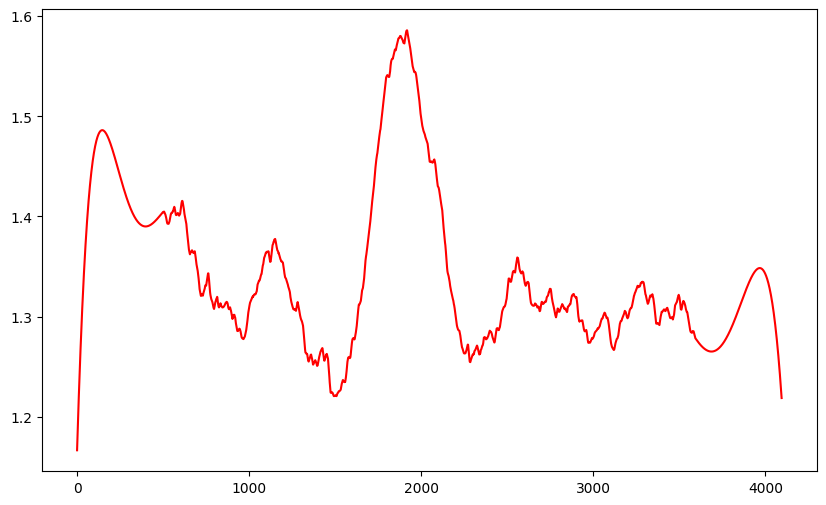

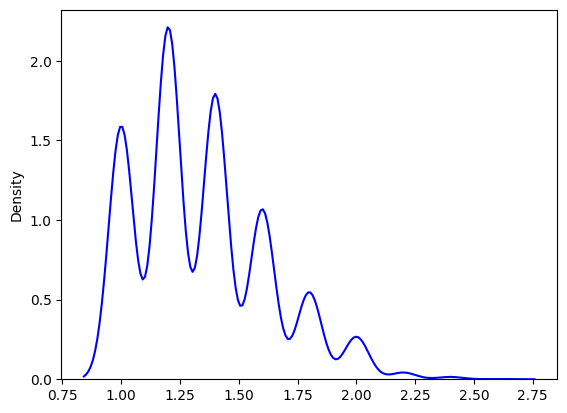

In [9]:
waiting_queue_len_values = [max(entry['metrics'][0]['waiting_queue_len'],
                                entry['metrics'][0]['waiting_queue_len']) for entry in data]  # Assuming first metric is representative
def running_average(data, window_size):
    """Compute the running average with a specified window size."""
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

# waiting_queue_len_values_smoothed = running_average(waiting_queue_len_values, 5)
waiting_queue_len_values_smoothed = savgol_filter(waiting_queue_len_values, 1000, 5)
# For demonstration, let's overlay this with the more smoothed overhead plot,
# reusing the 'more_smoothed_overhead' and 'error' variables from earlier.

# Re-plotting the more smoothed overhead with error bars
fig, ax1 = plt.subplots(figsize=(10, 6))
# ax1.plot(waiting_queue_len_values)
ax1.plot(waiting_queue_len_values_smoothed, color='r')

plt.figure()
sns.kdeplot(waiting_queue_len_values, color='b')

In [ ]:
waiting_queue_len_values = [max(entry['metrics'][0]['waiting_queue_len'],
                                entry['metrics'][0]['waiting_queue_len']) for entry in data]  # Assuming first metric is representative